# INTRODUCTION

# Problem Statement

# Objectives

# Data loading

First, we import the necessary python libraries

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we load the dataset using pandas, and look at the first 5 rows.

In [ ]:
data = pd.read_csv('./data/kc_house_data.csv')
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Description of columns

In [ ]:
data.shape

(21597, 21)

The dataset contains 21 columns and 21,597 rows.

Now to go into more detail on the columns we have. We will use the `column_names.md` file to get more information about our columns.

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house. An index from 0 to 4 of how good the view of the property was.
* `condition` - How good the overall condition of the house is. Related to maintenance of house. An index from 1 to 5 on the condition of the house.
* `grade` - Overall grade of the house. Related to the construction and design of the house, where 1-3 is poor, 4-6 is low average, 7 is average, 8-9 is good, and 10-13 is excellent.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

# Initial Data Exploration

In [ ]:
# Looking at a summary of column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Observations

* `id` - integer ( Should be a string)

* `date` - object (Should be datetime)

* `bathrooms` - float64 (Should be integer, as there are no half bathrooms)

* `floors` - float64 (Should be integer)

* `condition` - object (Should be integer, An index from 1 to 5 on the condition of the house.)

* `grade`: object (Should be split into the grade number, an integer, and the grade comment, which is a string)

* `sqft_basement`: object (Should be converted to a float)

In [ ]:
# Convert the 'id' column to a string
data['id'] = data['id'].astype(str)

# Converting 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Converting 'bathrooms' column from float to the nearest integer
data['bathrooms'] = data['bathrooms'].round().astype(int)

# Converting the 'floors' column from float to the nearest integer
data['floors'] = data['floors'].round().astype(int)

In [ ]:
# Checking the unique values in 'condition' column
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [ ]:
# Define a mapping for the condition values to integers
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

# Apply the mapping to the 'condition' column
data['condition'] = data['condition'].map(condition_mapping)

# Confirm the conversion
data['condition'].head()


0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [ ]:
# Check the unique values in the 'grade' column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [ ]:
# Define a mapping for the grade values to integers
grade_mapping = {
    '3 Poor': 1,
    '4 Low': 2,
    '5 Fair': 3,
    '6 Low Average': 4,
    '7 Average': 5,
    '8 Good': 6,
    '9 Better': 7,
    '10 Very Good': 8,
    '11 Excellent': 9,
    '12 Luxury': 10,
    '13 Mansion': 11
}

# Apply the mapping to the 'grade' column
data['grade_numeric'] = data['grade'].map(grade_mapping)

# Create a new column to describe the resulting condition
grade_description = {
    1: 'Poor',
    2: 'Low',
    3: 'Fair',
    4: 'Low Average',
    5: 'Average',
    6: 'Good',
    7: 'Better',
    8: 'Very Good',
    9: 'Excellent',
    10: 'Luxury',
    11: 'Mansion'
}

data['grade_description'] = data['grade_numeric'].map(grade_description)

# Confirm the new columns
data[['grade', 'grade_numeric', 'grade_description']].head()


,grade,grade_numeric,grade_description
0,7 Average,5,Average
1,7 Average,5,Average
2,6 Low Average,4,Low Average
3,7 Average,5,Average
4,8 Good,6,Good


In [ ]:
# Replace non-numeric values with NaN and convert the column to numeric
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', pd.NA), errors='coerce')

# Confirm the conversion
data['sqft_basement'].dtype


dtype('float64')

In [ ]:
# Checking the unique values in 'waterfront'
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [ ]:
# Convert 'waterfront' values to 1 and 0
waterfront_mapping = {
    'YES': 1,
    'NO': 0
}

data['waterfront'] = data['waterfront'].map(waterfront_mapping)

# Confirm the conversion
data['waterfront'].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [ ]:
# Looking for null values
data.isna().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement         454
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
grade_numeric           0
grade_description       0
dtype: int64

In [ ]:
# Checking the percentage of the missing values
(data.isna().sum()/data.shape[0])*100

id                    0.000000
date                  0.000000
price                 0.000000
bedrooms              0.000000
bathrooms             0.000000
sqft_living           0.000000
sqft_lot              0.000000
floors                0.000000
waterfront           11.001528
view                  0.291707
condition             0.000000
grade                 0.000000
sqft_above            0.000000
sqft_basement         2.102144
yr_built              0.000000
yr_renovated         17.789508
zipcode               0.000000
lat                   0.000000
long                  0.000000
sqft_living15         0.000000
sqft_lot15            0.000000
grade_numeric         0.000000
grade_description     0.000000
dtype: float64

Missing Values Observations:
* `waterfront` has some missing values (11% of the data)

* `view` has a few missing values (0.29% of the data)

* `sqft_basement` has a few nissing values (2.1% of the data)

* `yr_renovated` has many missing values (17.79% of the data).


In [ ]:
# Get the unique entries in the view
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [ ]:
# Impute missing values in 'view' with the most common value
most_common_view = data['view'].mode()[0]
data['view'].fillna(most_common_view, inplace=True)

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_24705/151652684.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['view'].fillna(most_common_view, inplace=True)


In [ ]:
# Define a mapping for the view values to a numeric scale
view_mapping = {
    'NONE': 0,
    'FAIR': 1,
    'AVERAGE': 2,
    'GOOD': 3,
    'EXCELLENT': 4
}

# Apply the mapping to the 'view' column
data['view'] = data['view'].map(view_mapping)

# Confirm the conversion
data['view'].head()


0    0
1    0
2    0
3    0
4    0
Name: view, dtype: int64

Srategies for dealing with the missing values:

1. `waterfront` (11%):

    Since waterfront is a categorical variable, we can fill the missing values with the most frequent category: 'NO', which is 0

2. `yr_renovated` (17.79%):
    
    We can fill the missing values with 0. 
    
    A value of 0 might indicate that the house was never renovated.

3. `sqft_basement` (2.1%)

    we can also fill in with the mode

In [ ]:
# Calculate the mode of 'sqft_basement'
mode_sqft_basement = data['sqft_basement'].mode()[0]

# Impute missing values in 'sqft_basement' with the mode
data['sqft_basement'].fillna(mode_sqft_basement, inplace=True)

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_24705/228812765.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sqft_basement'].fillna(mode_sqft_basement, inplace=True)


In [ ]:
# Impute missing values in 'waterfront' with the most common value
most_common_waterfront = data['waterfront'].mode()[0]
data['waterfront'].fillna(most_common_waterfront, inplace=True)

# Impute missing values for 'yr_renovated' with 0
data['yr_renovated'] = data['yr_renovated'].fillna(0)

# Verify if there are any missing values left
data.isna().sum()

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_24705/3454357215.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['waterfront'].fillna(most_common_waterfront, inplace=True)


id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
grade_numeric        0
grade_description    0
dtype: int64

Now we can check for duplicate entries in our data

In [ ]:
data.duplicated().sum()

0

We have none. 

Next we can calculate the cardinality of each column

In [ ]:
data.nunique()

id                      21420
date                      372
price                    3622
bedrooms                   12
bathrooms                   9
sqft_living              1034
sqft_lot                 9776
floors                      4
waterfront                  2
view                        5
condition                   5
grade                      11
sqft_above                942
sqft_basement             303
yr_built                  116
yr_renovated               70
sqft_living15             777
sqft_lot15               8682
grade_numeric              11
grade_description          11
age_of_house              116
renovation_age             70
total_square_footage     1161
dtype: int64

We can tell that we have some entries that have the same ids. let's extract those entries and have a closer look to check if they are duplicates

In [ ]:
# Find entries with the same id
duplicate_ids = data[data.duplicated(subset=['id'], keep=False)]

# Count the number of such entries
duplicate_ids_count = duplicate_ids.shape[0]

duplicate_ids, duplicate_ids_count


(               id       date      price  bedrooms  bathrooms  sqft_living  \
 93     6021501535 2014-07-25   430000.0         3          2         1580   
 94     6021501535 2014-12-23   700000.0         3          2         1580   
 313    4139480200 2014-06-18  1380000.0         4          3         4290   
 314    4139480200 2014-12-09  1400000.0         4          3         4290   
 324    7520000520 2014-09-05   232000.0         2          1         1240   
 ...           ...        ...        ...       ...        ...          ...   
 20654  8564860270 2015-03-30   502000.0         4          2         2680   
 20763  6300000226 2014-06-26   240000.0         4          1         1200   
 20764  6300000226 2015-05-04   380000.0         4          1         1200   
 21564  7853420110 2014-10-03   594866.0         3          3         2780   
 21565  7853420110 2015-05-04   625000.0         3          3         2780   
 
        sqft_lot  floors  waterfront  view  ...  sqft_basement

We can see that they are the same houses, with different selling dates. We can assume that these are houses that have been sold more than once at different times.

In [ ]:
# Verify the cleaning steps
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  float64       
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  int64         
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  int64         
 8   waterfront         21597 non-null  float64       
 9   view               21597 non-null  int64         
 10  condition          21597 non-null  int64         
 11  grade              21597 non-null  object        
 12  sqft_above         21597 non-null  int64         
 13  sqft_basement      21597 non-null  float64       
 14  yr_bui

# Feature Engineering
We have already created the new column `grade_numeric` to help us with our analysis.

We can consider creating the following new features:

1. `age_of_house`: age = 2024 - yr_built
2. `renovation_age`: renovation_age = 2024 - yr_renovated (if renovated, otherwise 0)
3. `total_square_footage`: total_sqft = sqft_living + sqft_basement

In [ ]:
# 1. Age of the house
data['age_of_house'] = 2024 - data['yr_built']

# 2. Renovation age
data['renovation_age'] = data.apply(lambda row: 2024 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)

# 3. Total square footage
data['total_square_footage'] = data['sqft_living'] + data['sqft_basement']

# Display the new columns to confirm the changes
data[['age_of_house', 'renovation_age', 'total_square_footage']].head()


,age_of_house,renovation_age,total_square_footage
0,69,0.0,1180.0
1,73,33.0,2970.0
2,91,0.0,770.0
3,59,0.0,2870.0
4,37,0.0,1680.0


We can drop the following columns as we will not be using them in our analysis: 

`zipcode`, `lat`, `long`

In [ ]:
# Drop the columns 'zipcode', 'lat', and 'long'
data.drop(columns=['zipcode', 'lat', 'long'], inplace=True)

# Confirm the columns have been dropped
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'grade_numeric', 'grade_description',
       'age_of_house', 'renovation_age', 'total_square_footage'],
      dtype='object')

# Summary Statistics

In [ ]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_numeric,age_of_house,renovation_age,total_square_footage
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.233181,...,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.657915,53.000324,0.967032,2366.038431
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,9.000000,0.000000,370.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,5.000000,27.000000,0.000000,1500.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,...,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,5.000000,49.000000,0.000000,2160.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.000000,73.000000,0.000000,2980.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,11.000000,124.000000,90.000000,17670.000000
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.764673,...,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,1.173200,29.375234,5.880857,1175.817847


# Initial visualizations

First we can have a look at the distribution of our numerical variables

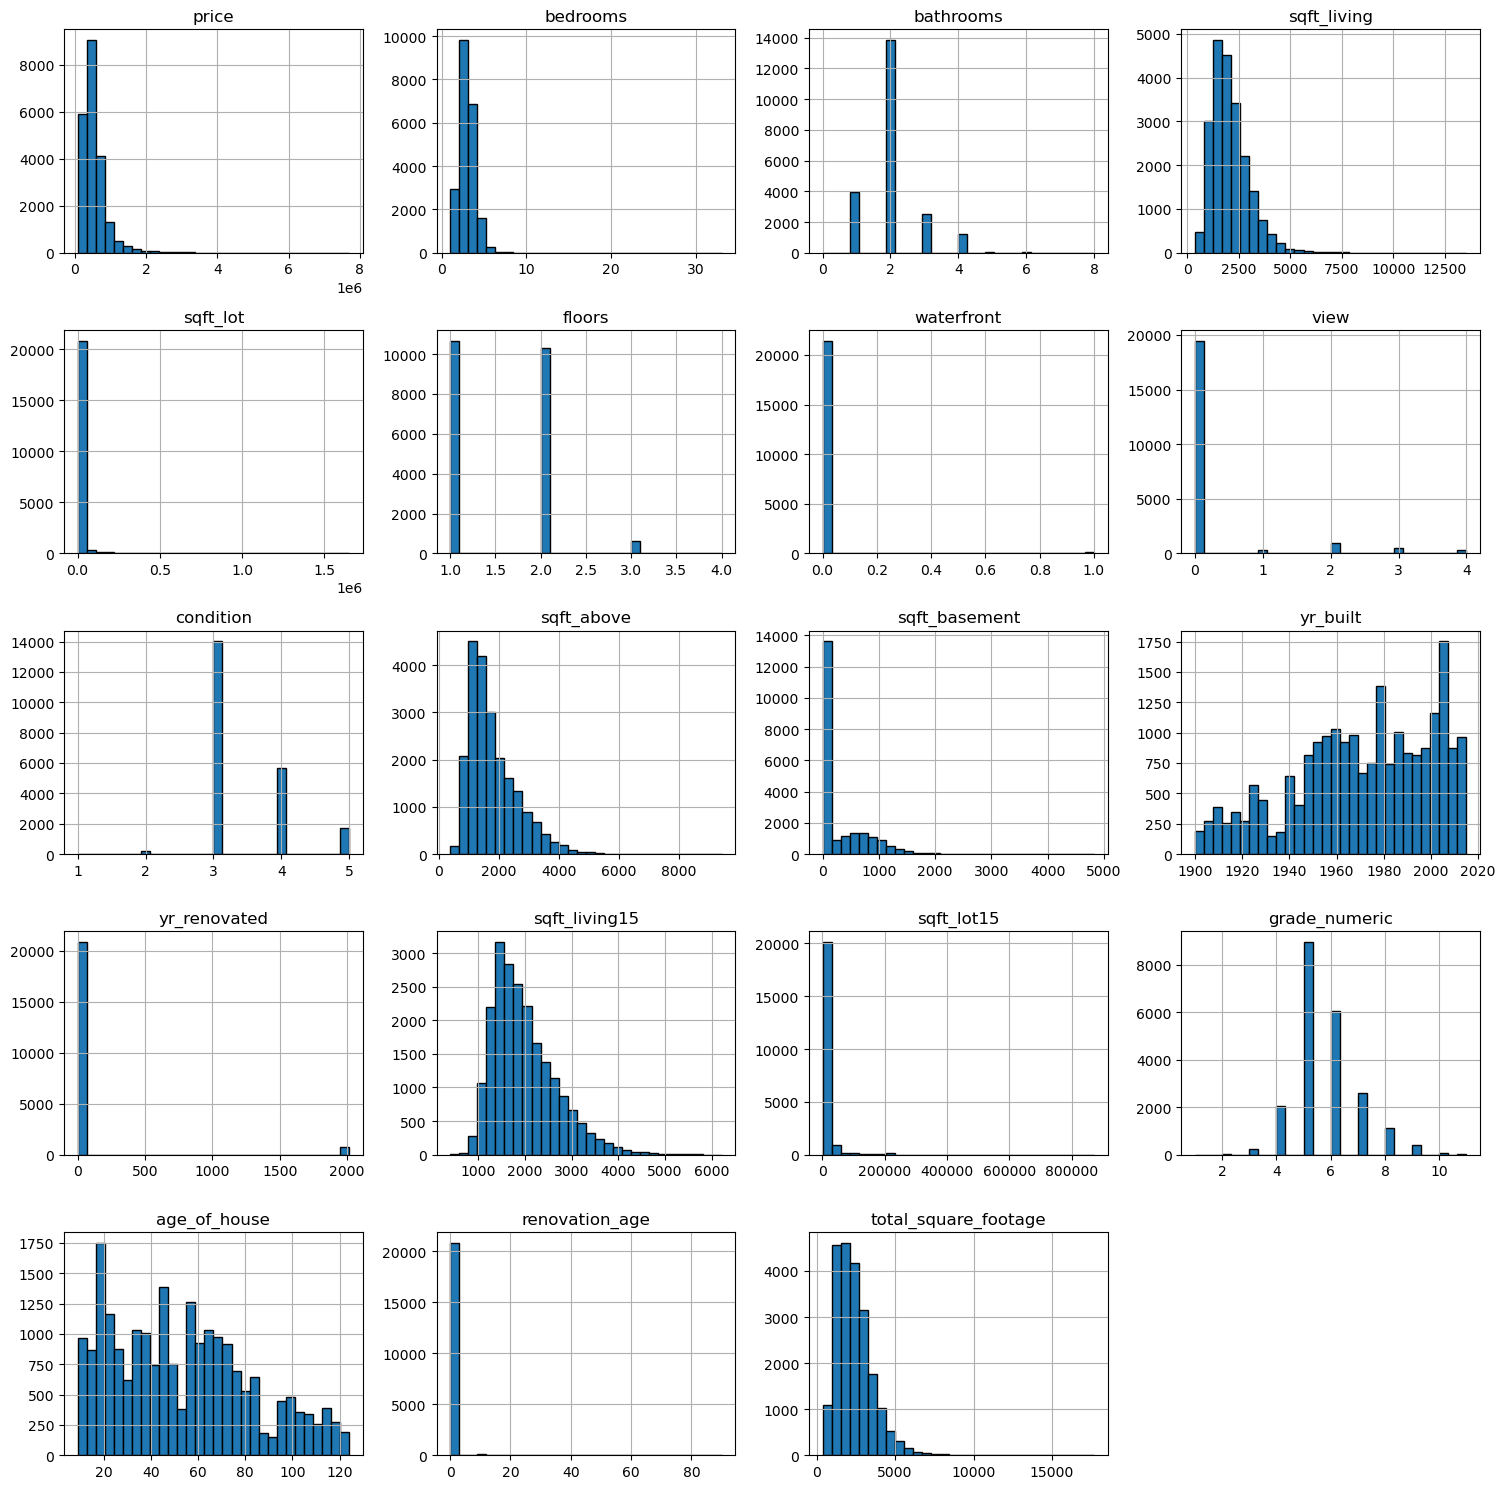

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
data[numerical_columns].hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


## Observations
1. **Price**:

    * The distribution is right-skewed, indicating that most houses are priced below $1 million, with a few very high-priced properties.

2. **Bedrooms**:

    * Most houses have 3 to 4 bedrooms. There are few houses with more than 6 bedrooms, and very few with exceptionally high bedroom counts.

3. **Bathrooms**:

    * Most houses have between 1 and 3 bathrooms. The distribution shows a right skew with fewer houses having more than 4 bathrooms.

4. **Sqft_Living**:

    *The distribution is right-skewed, with most houses having less than 4000 sqft of living space.

5. **Sqft Lot**:

    * The distribution is heavily right-skewed with most houses having lot sizes less than 15,000 sqft. There are a few outliers with very large lot sizes.

6. **Floors**:

    * Most houses have either 1 or 2 floors, with very few having 3 or more floors.

7. **Waterfront**:

    * The distribution indicates that a very small number of houses are on the waterfront.

8. **View**:

    * The majority of houses have a view rating of 0 (none). Other view ratings (1 to 4) are much less common.

9. **Condition**:

    * Most houses have a condition rating of 3 (Average) or 4 (Good), with fewer houses rated as 1 (Poor) or 5 (Very Good).

10. **Sqft Above**:

    * The distribution is right-skewed, similar to sqft_living, indicating that most houses have less than 3000 sqft above ground.

11. **Sqft Basement**:

    * Most houses either have no basement or have a basement size less than 1500 sqft. The distribution shows a sharp drop-off after that.

12. **Yr Built**:

    * The distribution is relatively uniform with peaks around the 1950s and 2000s, indicating periods of increased construction.

13. **Yr Renovated**:

    * Most houses have a renovation year of 0 (indicating no renovation). For those that have been renovated, the distribution shows peaks in more recent years.

14. **Sqft Living15**:

    * The distribution is right-skewed, with most houses having neighboring houses with less than 4000 sqft of living space.

15. **Sqft Lot15**:


    * The distribution is heavily right-skewed with most houses having neighboring lot sizes less than 20,000 sqft, but some have much larger neighboring lot sizes.

16. **Grade Numeric**:

    * Most houses have a grade between 5 (Average) and 7 (Good). Higher grades are less common.

17. **Age of House**:

    * The distribution indicates that many houses are between 20 to 80 years old, with fewer houses being either very new or very old.

18. **Renovation Age**:

    * Most houses either have a renovation age of 0 or were renovated in the past 20 years. There are fewer houses with renovations older than that.

19. Total Square Footage:

    * The distribution is right-skewed with most houses having a total square footage (living + basement) of less than 4000 sqft.

## Calculating the correlation matrix

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data[numerical_columns].corr()

correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade_numeric,age_of_house,renovation_age,total_square_footage
price,1.000000,0.308787,0.519628,0.701917,0.089876,0.244832,0.264306,0.393497,0.036056,0.605368,0.321108,0.053953,0.117855,0.585241,0.082845,0.667951,-0.053953,0.082779,0.668185
bedrooms,0.308787,1.000000,0.487955,0.578212,0.032471,0.180246,-0.002127,0.078354,0.026496,0.479386,0.297229,0.155670,0.017900,0.393406,0.030690,0.356563,-0.155670,-0.001090,0.562662
bathrooms,0.519628,0.487955,1.000000,0.702719,0.090532,0.327893,0.064619,0.201062,-0.068032,0.600458,0.329018,0.378287,0.062153,0.498534,0.087931,0.591830,-0.378287,0.029385,0.671770
sqft_living,0.701917,0.578212,0.702719,1.000000,0.173453,0.321904,0.104637,0.281715,-0.059445,0.876448,0.428660,0.318152,0.051060,0.756402,0.184342,0.762779,-0.318152,0.029876,0.941166
sqft_lot,0.089876,0.032471,0.090532,0.173453,1.000000,-0.001542,0.021459,0.075054,-0.008830,0.184139,0.015031,0.052946,0.004979,0.144763,0.718204,0.114731,-0.052946,0.011344,0.141058
floors,0.244832,0.180246,0.327893,0.321904,-0.001542,1.000000,0.021331,0.027089,-0.223543,0.488437,-0.242268,0.381176,0.011588,0.242887,-0.010322,0.408142,-0.381176,0.005564,0.160729
waterfront,0.264306,-0.002127,0.064619,0.104637,0.021459,0.021331,1.000000,0.380543,0.016648,0.071778,0.083050,-0.024487,0.073939,0.083823,0.030658,0.082818,0.024487,0.084828,0.112768
view,0.393497,0.078354,0.201062,0.281715,0.075054,0.027089,0.380543,1.000000,0.045622,0.166017,0.270629,-0.054452,0.090339,0.278928,0.073083,0.249082,0.054452,0.087319,0.321199
condition,0.036056,0.026496,-0.068032,-0.059445,-0.008830,-0.223543,0.016648,0.045622,1.000000,-0.158904,0.168482,-0.361592,-0.055808,-0.093072,-0.003126,-0.146896,0.361592,-0.021764,0.016606
sqft_above,0.605368,0.479386,0.600458,0.876448,0.184139,0.488437,0.071778,0.166017,-0.158904,1.000000,-0.051175,0.424037,0.020645,0.731767,0.195077,0.756073,-0.424037,0.012969,0.665209


1. Price: 
    * Highly correlated with sqft_living (0.701917), grade_numeric (0.667951), and total_square_footage (0.668185).

    * Moderately correlated with bathrooms (0.519628), sqft_above (0.605368), and sqft_living15 (0.585241).

2. Bedrooms:

    * Moderately correlated with sqft_living (0.578212), total_square_footage (0.562662), and sqft_above (0.479386).

3. Bathrooms:

    * Highly correlated with sqft_living (0.702719) and total_square_footage (0.671770).

4. Sqft Living:

    Very highly correlated with total_square_footage (0.941166).

    Highly correlated with sqft_above (0.876448) and bathrooms (0.702719).

5. Floors:

    * Shows some correlation with price (0.244832) and bathrooms (0.327893).

6. Waterfront:

    * Moderately correlated with price (0.264306) and view (0.393497).

7. View:

    * Moderately correlated with price (0.393497) and sqft_living (0.281715).

8. Condition:

    * Shows low correlation with most features.

9. Sqft Above:

    * Very highly correlated with sqft_living (0.876448).

10. Sqft Basement:

    * Moderately correlated with price (0.321108) and total_square_footage (0.708763).

11. Yr Built:

    * Shows low correlation with most features.

12. Yr Renovated:

    * Shows some correlation with price (0.117855).

13. Sqft Living15:

    * Highly correlated with sqft_living (0.756402) and total_square_footage (0.665161).

14. Sqft Lot15:

    * Highly correlated with sqft_lot (0.718204).

15. Grade Numeric:

    * Highly correlated with price (0.667951) and sqft_living (0.762779).

16. Age of House:

    * Negatively correlated with price (-0.053953) and grade_numeric (-0.199762).

17. Renovation Age:

    * Shows low correlation with most features.

18. Total Square Footage:

    * Very highly correlated with sqft_living (0.941166).

### Visualizing The Correlation Matrix

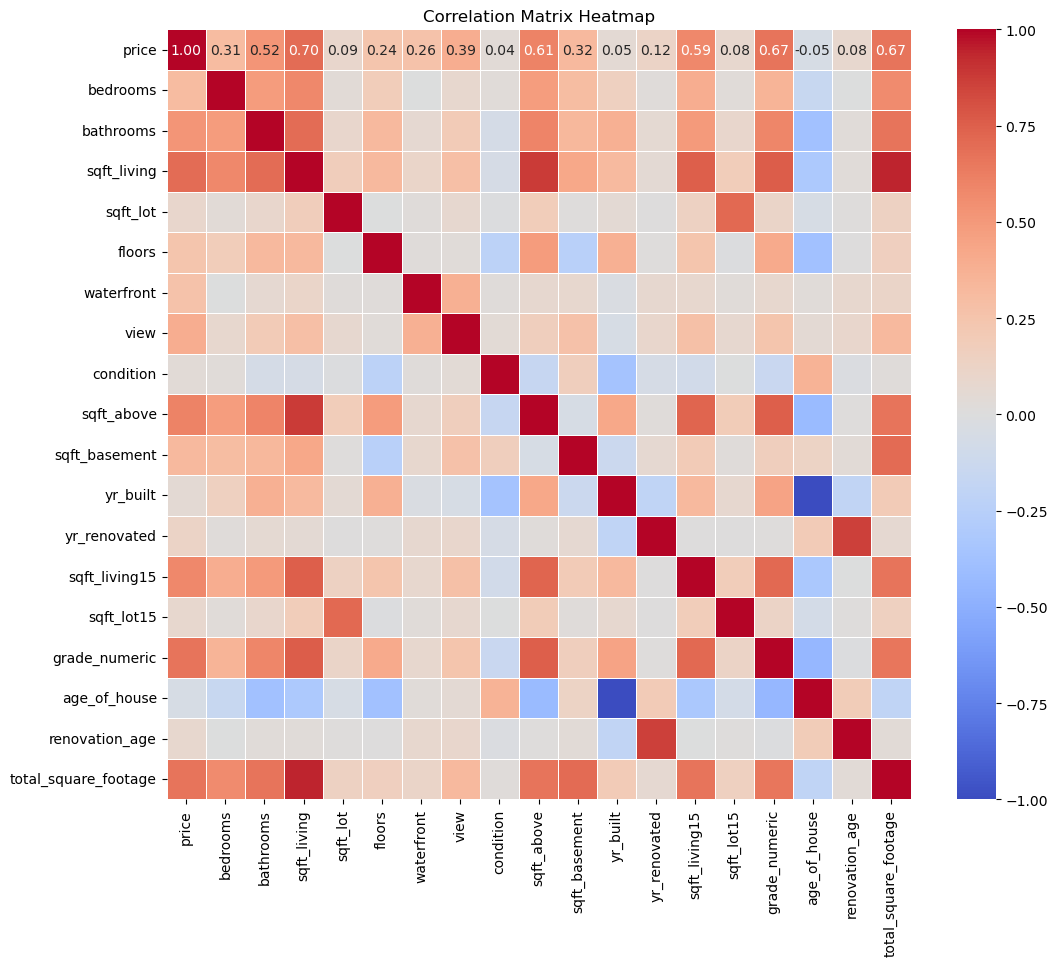

In [ ]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Calculating correlation of columns with price

In [ ]:
# Extract correlations with price and sort them in descending order
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Select only positive correlations
positive_price_correlations = price_correlations[price_correlations > 0]

# select only negative correlations
negative_price_correlations = price_correlations[price_correlations < 0]

# show them
positive_price_correlations, negative_price_correlations

(price                   1.000000
 sqft_living             0.701917
 total_square_footage    0.668185
 grade_numeric           0.667951
 sqft_above              0.605368
 sqft_living15           0.585241
 bathrooms               0.519628
 view                    0.393497
 sqft_basement           0.321108
 bedrooms                0.308787
 waterfront              0.264306
 floors                  0.244832
 yr_renovated            0.117855
 sqft_lot                0.089876
 sqft_lot15              0.082845
 renovation_age          0.082779
 yr_built                0.053953
 condition               0.036056
 Name: price, dtype: float64,
 age_of_house   -0.053953
 Name: price, dtype: float64)

**Top Correlations with price**:

1. `sqft_living`             0.701917
2. `total_square_footage`    0.668185
3. `grade_numeric`           0.667951
4. `sqft_above`              0.605368
5. `sqft_living15`           0.585241
6. `bathrooms`               0.519628
7. `view`                    0.393497
8. `sqft_basement`           0.321108
9. `bedrooms`                0.308787
10. `waterfront`              0.264306
11. `floors`                  0.244832
12. `yr_renovated`            0.117855
13. `sqft_lot`                0.089876
14. `sqft_lot15`              0.082845
15. `renovation_age`          0.082779
16. `yr_built`                0.053953
17. `condition`               0.036056

**Negative correlation with price**

18. `age_of_house`   -0.053953

## Visualizing the correlations with price

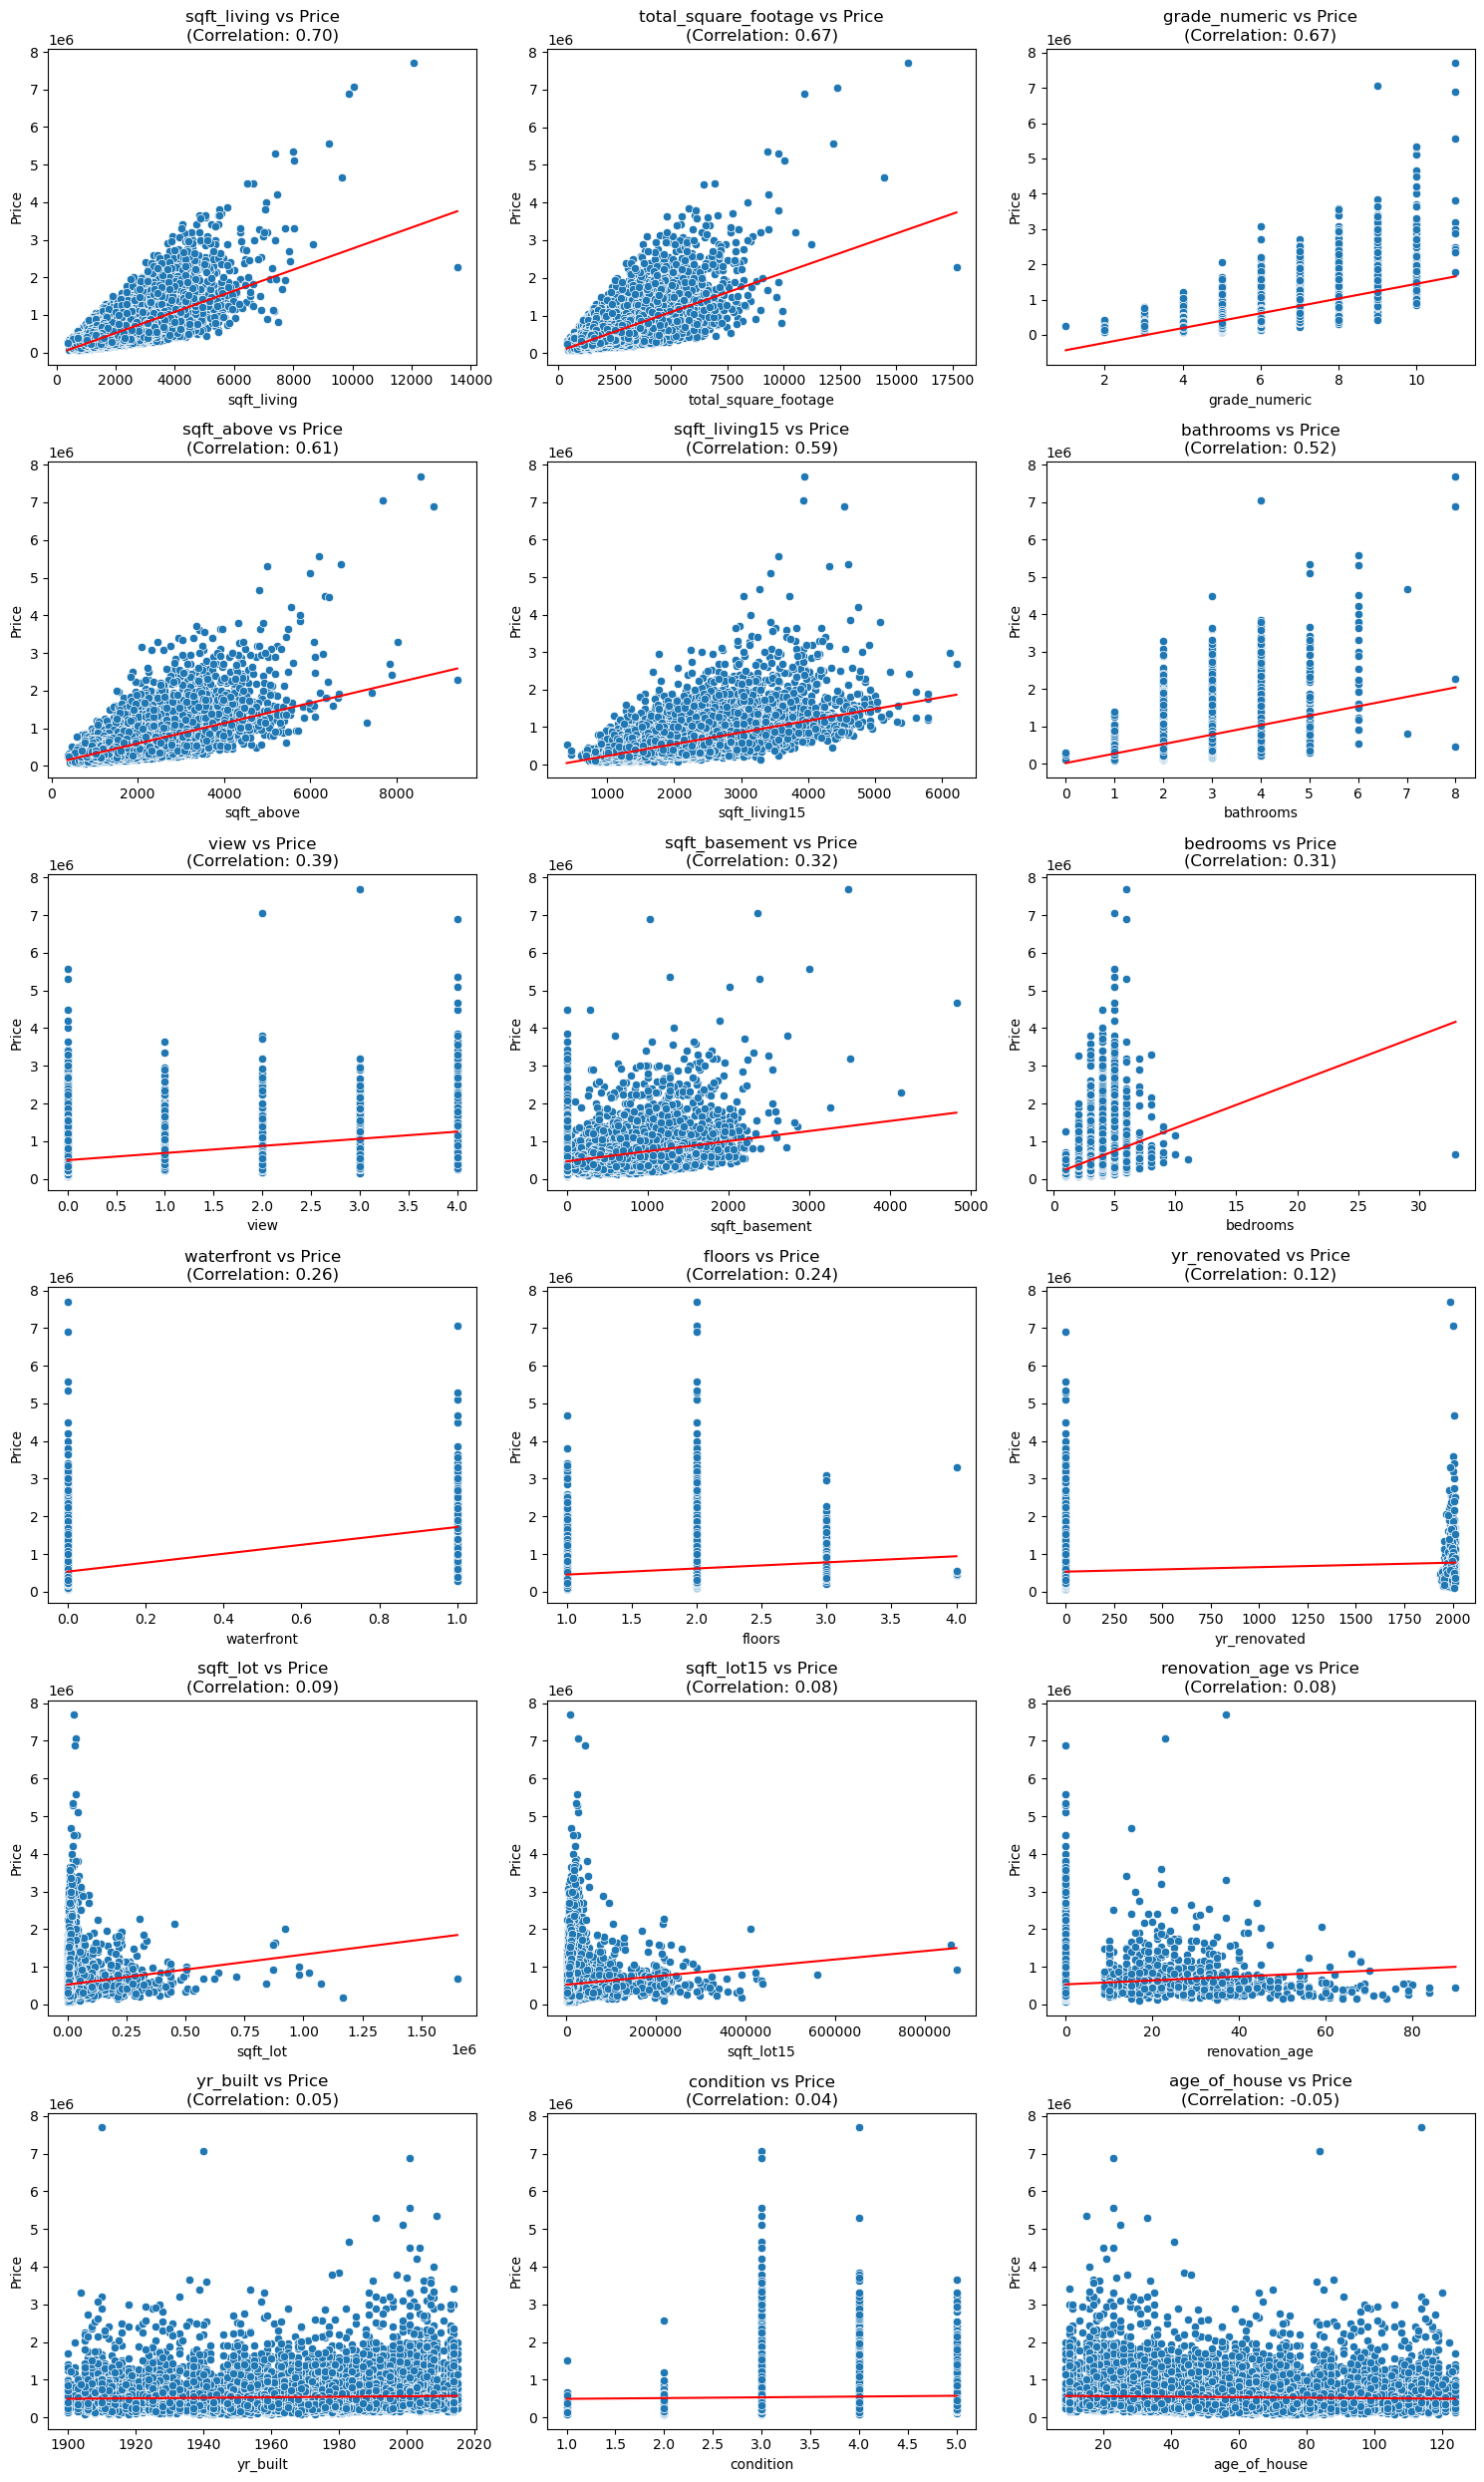

In [ ]:
# List of columns to plot against price
columns_to_plot = [
    'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

# Number of columns
num_cols = len(columns_to_plot)

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column against price
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.scatterplot(data=data, x=col, y='price', ax=ax)
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(data[col], data['price'])[0, 1]
    # Plot the red line for correlation
    ax.plot(np.unique(data[col]), np.poly1d(np.polyfit(data[col], data['price'], 1))(np.unique(data[col])), color='red')
    ax.set_title(f'{col} vs Price\n(Correlation: {corr_coef:.2f})')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Checking for outliers

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for outliers
columns_to_check = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

# Detect outliers for each column
outliers_dict = {col: detect_outliers_iqr(data, col) for col in columns_to_check}

# Summarize the number of outliers for each column
outliers_summary = {col: len(outliers) for col, outliers in outliers_dict.items()}

# Display the summary of outliers
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['Number of Outliers'])
print(outliers_summary_df)

                      Number of Outliers
price                               1158
sqft_living                          571
total_square_footage                 545
grade_numeric                       1905
sqft_above                           610
sqft_living15                        543
bathrooms                           7750
view                                2112
sqft_basement                        560
bedrooms                             530
waterfront                           146
floors                                 7
yr_renovated                         744
sqft_lot                            2419
sqft_lot15                          2188
renovation_age                       744
yr_built                               0
condition                             29
age_of_house                           0


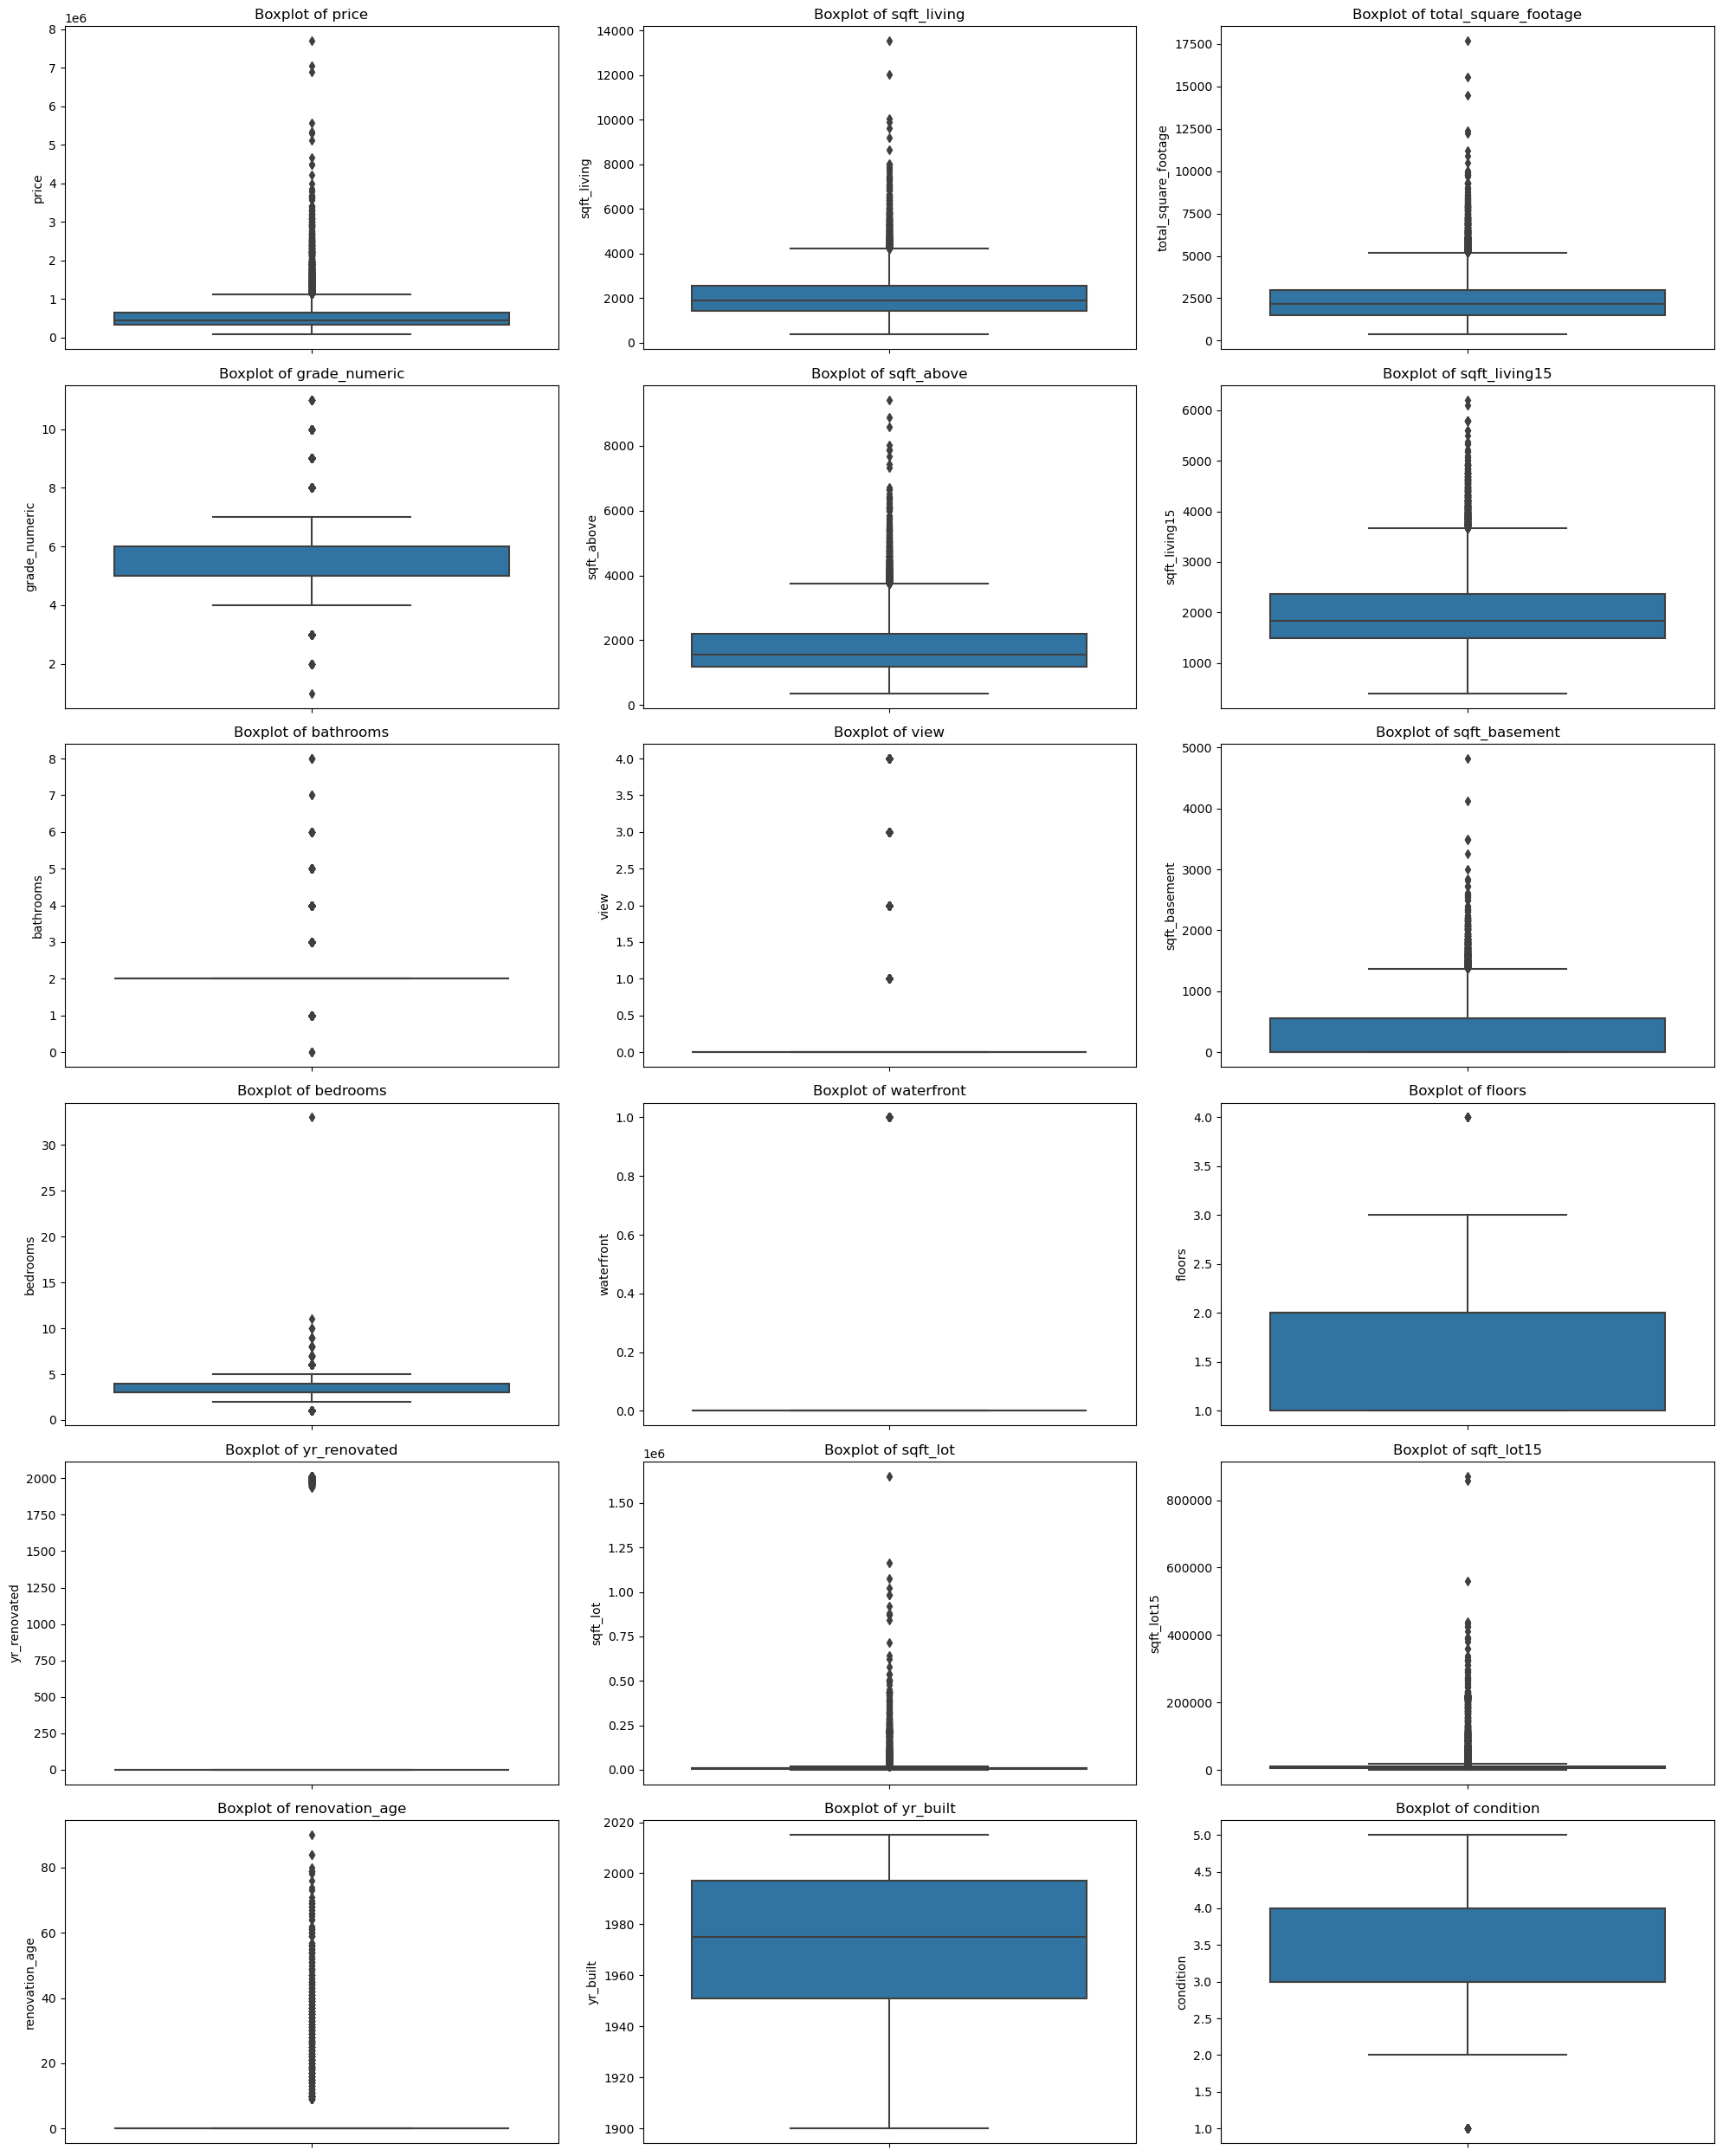

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to check for outliers
columns_to_check = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition'
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column to visualize outliers
for i, col in enumerate(columns_to_check):
    ax = axes[i]
    sns.boxplot(data=data, y=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The dataset's shape before and after outlier removal:

**Original Shape**: 21,597 rows, 21 columns

**Cleaned Shape**: 19,388 rows, 21 columns

Here, only `total_sqft` shows a positive correlation that can be useful in our modeling

# Simple Liner Regression Model
For our first simple regression model, we will use `sqft_living`, since it showed the highest correlation.

## `sqft_living` as the predictor (corr: 0.7019)

1. We'll split the dataset into training and testing sets using an 80-20 split.

2. Then we train the model

3. and make predictions using the trained model.

4. Finally we evaluate the performance of the model.

In [ ]:
selected_predictors = data_clean[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 
                                            'sqft_basement', 'bedrooms', 'lat', 'floors', 'yr_renovated', 
                                            'sqft_lot', 'sqft_lot15', 'yr_built', 'long', 'total_sqft']]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the feature and target variable
X = data[['sqft_living']]
y = data['price']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(170982.9246595554, 65977373783.61765, 0.4933246923797946)

1. **Mean Absolute Error (MAE)**: 170,982

    * On average, our predictions are off by about **$170,982**. 

2. **R-squared (R²)**: 0.4933
    * The model explains about **49.33%** of the variance in house prices, showing that sqft_living is an important but not sufficient predictor on its own. There are many other factors affecting house prices that the model does not capture.

### Visualization of this model's results

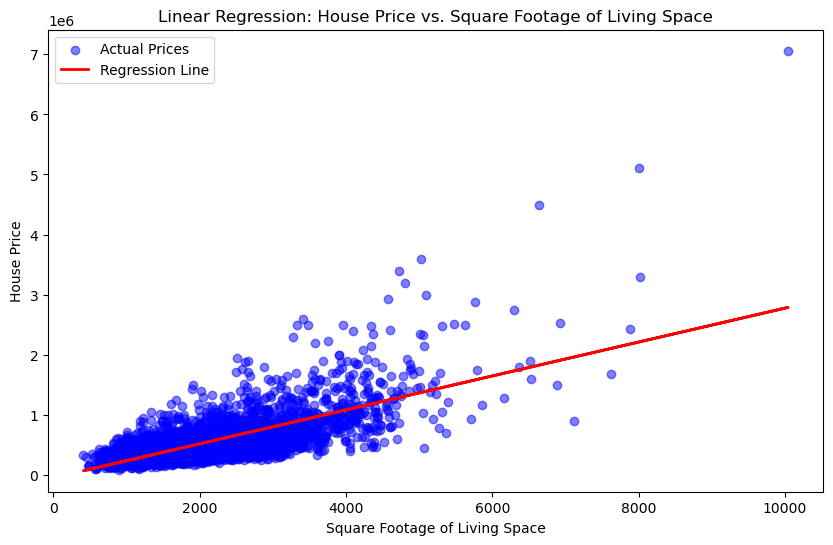

In [ ]:
# Scatter plot of the actual house prices vs. sqft_living
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Prices')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Square Footage of Living Space')
plt.ylabel('House Price')
plt.title('Linear Regression: House Price vs. Square Footage of Living Space')
plt.legend()

# Display the plot
plt.show()

The blue points represent the actual prices, and the red line represents the regression line obtained from our linear regression model.

### Plotting the residuals

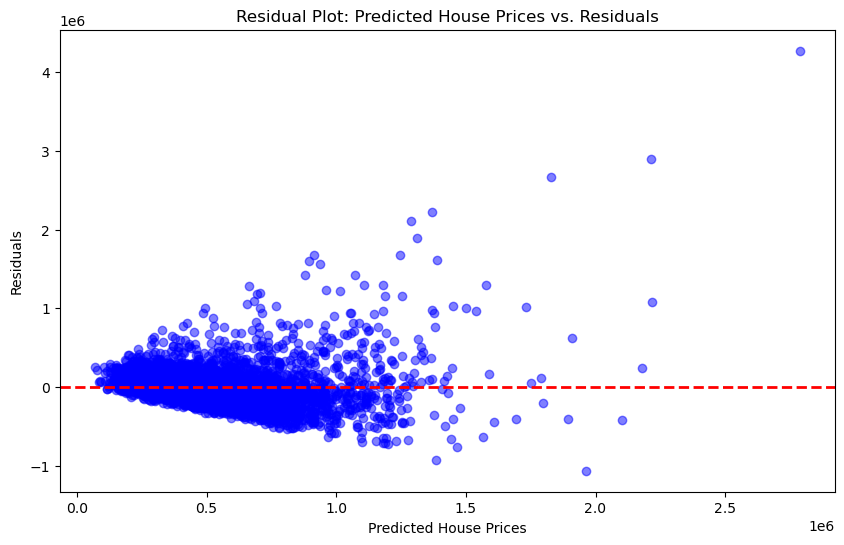

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted House Prices vs. Residuals')

# Display the plot
plt.show()

### Observations:
1. **Funnel Shape:** 
    * The residuals appear to spread out more as the predicted house prices increase, suggesting heteroscedasticity. This means the variance of the errors increases with the predicted value.

2. **Randomness**: 
    * While there is some randomness in the residuals, the increasing spread is a concern.

3. **Outliers**: 
    There are some large residuals (both positive and negative), indicating that there are predictions that are significantly off from the actual values.

### Implications:
* **Model Fit**: The model might not be capturing all the complexity of the data, particularly for higher-priced houses.

* **Model Improvement**: Consider transforming the dependent variable, using a different model, or addressing heteroscedasticity (e.g., using weighted least squares).


### Removing outliers

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Removing Outliers
for col in columns_to_check:
    data_without_outliers = remove_outliers_iqr(data, col)

# Confirm the number of rows remaining after removing outliers
print(data_without_outliers.shape)

(21568, 23)


### Simple Regression without outliers

In [ ]:
# Extract the feature and target variable
X = data_without_outliers[['sqft_living']]
y = data_without_outliers['price']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(174861.09506793635, 71731523038.77275, 0.48876301012019185)

# Multiple Linear Regression Model

In [ ]:
selected_predictors = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the best feature set and the target variable
X_multiple = data[selected_predictors]
y = data['price']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, r2, mae


(6.616999423837147e-18, 1.0, 1.5932191335768612e-09)

Interpretation:
1. **R-squared** (R2 = 1.0):

    * An R-squared value of 1.0 indicates a perfect fit. 
    
    * This means the model explains all the variability in the target variable. This is extremely rare in practical scenarios and suggests that the model might be overfitting, especially if the training data is not representative of the broader dataset.

2. **Mean Squared Error** (MSE ≈ 0):

    * The MSE is very close to zero, indicating that the predicted values are very close to the actual values. 

    * However, this also suggests overfitting if it is too good to be true.

3. Mean Absolute Error (MAE ≈ 0):

    * Similarly, the MAE being extremely low indicates that the average absolute difference between the predicted and actual values is very small.